In [1]:
pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.18.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [2]:
#in built dataset from sklearn is used
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
boston_dataset # it returns a dictionary
# print(boston_dataset.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:,-1]

In [6]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)
# (x_train.shape, y_train.shape,x_test.shape, y_test.shape)

In [8]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81
378,23.64820,0.0,18.10,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
244,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50
444,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69


In [9]:
# Apply Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [10]:
# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)
lreg_y_pred # shows predicted prices of houses from test data

array([11.73979077,  6.87622974, 15.51875067, 16.30947247, 15.31513857,
       33.82239081, 19.31702703, 18.62517876, 22.80951667, 20.956487  ,
       13.77412788, 20.82207748, 20.75890344, 34.09948975, 27.52806971,
       28.68945475, 23.01957405, 30.52844634, 15.69091187, 17.95154508,
       34.14184077, 31.15313826, 20.93215391, 16.46595241, 27.82803465,
       25.59668241, 14.49093283, 15.0863153 , 22.15917736, 24.90044092,
       28.22047819, 18.39535458, 25.60288148, 23.91625447, 17.71749775,
       17.39278396, 17.91992401, 13.20529105, 19.99815039, 15.45071472,
       23.05515148, 24.96135562, 26.24730871, 23.33377495,  9.52073659,
       10.03724583, 22.42854642, 31.66072263, 17.17513133, 21.7399523 ,
       26.80397006, 41.2305159 , 19.49534367, 15.96209036, 12.71001646,
       14.90227187, 24.85565619,  4.3826461 , 28.22944587, 25.49626093,
       20.14858995, 32.09269297, 19.56512602, 24.13204334, 24.05126675,
       32.63918892, 13.64107198, 17.75900022, 16.72023382, 41.64

In [11]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error) # high error

Mean squared Error on test set :  24.970397107109953


In [12]:
# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient) # y=-0.11X1 + 0.02X2 - 0.03X3 + ......

# model is giving too much importance to NOX feature as it is highly negative. See description of NOX - poisonous gas or pollution. If more pollution House price will be lower

    Columns  Coefficient Estimate
0      CRIM             -0.104265
1        ZN              0.048989
2     INDUS             -0.006740
3      CHAS              5.173518
4       NOX            -16.640268
5        RM              4.044780
6       AGE              0.002423
7       DIS             -1.558996
8       RAD              0.264520
9       TAX             -0.008914
10  PTRATIO             -0.887623
11        B              0.007435
12    LSTAT             -0.597451


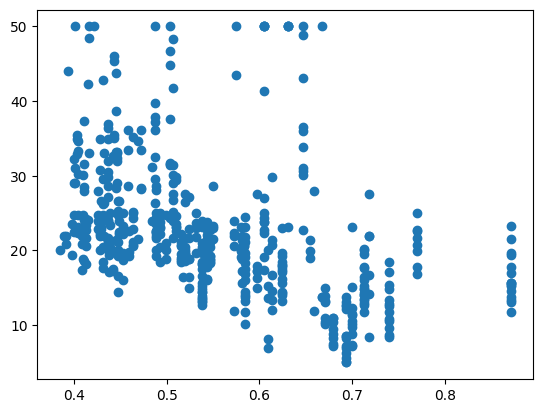

In [13]:
plt.scatter(boston_pd['NOX'], boston_pd['House Price'])
# not so high negative correlation. upto 0.7 NOX prices are still high. So our model should not give much importance to NOX

<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

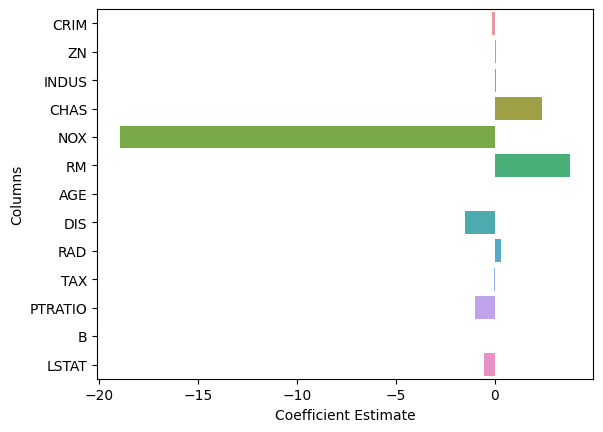

In [ ]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [14]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 2) # alpha is a hyper parameter which needs to be experimented, Default is 1. Range is 1 to infinity
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

In [15]:
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

25.418359600004838


In [16]:
# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Linear Coeff.Estimate'] = pd.Series(lreg.coef_)
ridge_coefficient['Ridge Coeff.Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

    Columns  Linear Coeff.Estimate  Ridge Coeff.Estimate
0      CRIM              -0.104265             -0.101897
1        ZN               0.048989              0.049663
2     INDUS              -0.006740             -0.042596
3      CHAS               5.173518              4.764855
4       NOX             -16.640268             -5.304752
5        RM               4.044780              4.096078
6       AGE               0.002423             -0.007609
7       DIS              -1.558996             -1.397299
8       RAD               0.264520              0.235770
9       TAX              -0.008914             -0.009704
10  PTRATIO              -0.887623             -0.792259
11        B               0.007435              0.007541
12    LSTAT              -0.597451             -0.612837


####  import Lasso regression from sklearn library



In [17]:
from sklearn.linear_model import Lasso
# Train the model
lasso = Lasso(alpha = 0.05)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

In [18]:
# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 25.794695274277963


In [19]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Linear Coeff.Estimate'] = pd.Series(lreg.coef_)
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

    Columns  Linear Coeff.Estimate  Coefficient Estimate
0      CRIM              -0.104265             -0.098918
1        ZN               0.048989              0.049647
2     INDUS              -0.006740             -0.053931
3      CHAS               5.173518              4.463437
4       NOX             -16.640268             -0.000000
5        RM               4.044780              4.102614
6       AGE               0.002423             -0.010899
7       DIS              -1.558996             -1.288532
8       RAD               0.264520              0.220896
9       TAX              -0.008914             -0.010156
10  PTRATIO              -0.887623             -0.740867
11        B               0.007435              0.007566
12    LSTAT              -0.597451             -0.622607


In [20]:
# import model
from sklearn.linear_model import ElasticNet
# Train the model
e_net = ElasticNet(alpha = .01,l1_ratio=.3) #l1_ratio should be in between 0 and 1. then it will be a combination of L1 and L2.
e_net.fit(x_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.3)

In [21]:
# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

Mean Squared Error on test set 25.406895574954504


In [22]:
e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff

,Columns,Coefficient Estimate
0,CRIM,-0.101718
1,ZN,0.049733
2,INDUS,-0.044333
3,CHAS,4.659962
4,NOX,-4.516148
5,RM,4.084972
6,AGE,-0.008031
7,DIS,-1.383593
8,RAD,0.234545
9,TAX,-0.009807
